<a href="https://colab.research.google.com/gist/bedohazizsolt/9f0f637dedd839e874a05750eacb518b/HW_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning & clustering
----
### 1. Reading data
The worldbank_jobs_2016.tsv (can be found in the same folder with this notebook) file contains the Jobs (and other) data for the 2016 year, downloaded from The World Bank's webpage.

- Look at the data in any text editor. Build up an overall sense how the data is built up and how the missing values are represented.
- Read the file into a pandas dataframe and tell pandas the delimiter (or separator) that separates the columns and which special pattern means if a value is missing.
- Keep only those rows, which represents countries, at the end there are some useless rows (with missing country code).
- The data is in a long format. Convert it into a wide format, where each row is a single country (with country code) and the column names are the features i.e. the Series Codes, the values in the columns are the measured values of the 2016 [YR 2016 column]. (eg the first column is 'EG.CFT.ACCS.ZS', the second is 'EG.ELC.ACCS.ZS'. Order of the columns does not matter)! Try to use the pivot method.
- Check that the features are in numeric format (dtypes), this will be needed for modeling!
-----
### 2. Data preprocessing and inspection
- Visualize the missing values!
- Keep only those countries which has less than 60 missing features in the original table.
- After this drop all features which have missing values for the remaining countries. (Imputation would also work but may introduce a bias because there is less data for less developed countries generally.)
- How many counties and features do we have left?
- Read the kept features' descriptions. In the original table the Series Name describe the meaning of the features. What do you think, based only on these information, which counties are the most similar to Hungary? And Greece?
------
### 3. PCA
- Perform PCA with 3 principal components on the filtered, imputed data (from now on, data refers to the filtered, imputed dataset)
- Plot the three embedded 2D combination next to each other (0 vs 1, 0 vs 2 and 1 vs 2)
- It seems that the embedding is really dominated by a single direction. Normalize the data (each feature should have zero mean and unit variance after normalization) and re-do the PCA and the plotting (do not delete the previous plots, just make new ones).
- Give some explaination for the second principal component: Look at the coefficients of the features which were use the calculate that principal component. For the features with the largest coefficient (in absolute value) look up the Series Name for the Code.
-----
### 4. T-SNE
- Perform T-SNE on the scaled data with 2 components
- Plot the embeddings results. Add a text label for each point to make it possible to interpret the results. It will not be possible to read all, but try to make it useful, see the attached image as an example!
- Highlight Hungary, Greece, Norway, China, Russia (HUN, GRC, NOR, CHN, RUS)! Which countries are the closest one to Hungary and Greece?
-------
### 5. Hierarchical and K-Means clustering
- Perform hierarchical clustering on the filtered and scaled data (hint: use seaborn)
- Try to plot in a way that all country's name is visible
- Perform K-Means clustering on the filtered and scaled data with 4 clusters.
- Make a plot with text label for each point as in the previous excersice but use different color for every cluster.
- Write down your impressions that you got from these two plots! Which cluster are China and Hungary in?
----
### Hints:
- On total you can get 10 points for fully completing all tasks.
- Decorate your notebook with questions, explanation etc, make it self contained and understandable!
- Comment your code when necessary!
- Write functions for repetitive tasks!
- Use the pandas package for data loading and handling
- Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
- Use the scikit learn package for almost everything
- Use for loops only if it is really necessary!
- Code sharing is not allowed between students! Sharing code will result in zero points.
- If you use code found on web, it is OK, but, make its source clear!

### Task 1

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('02_dataset_worldbank_jobs_2016.tsv', sep ='\t', na_values = "..")

In [4]:
df.head()

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,84.137138
1,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,68.794200
2,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,86.570932
3,Afghanistan,AFG,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,20.965898
4,Afghanistan,AFG,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,5.971751


In [5]:
df.dropna(subset=["Country Code"], inplace= True)
df.head()

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,84.137138
1,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,68.794200
2,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,86.570932
3,Afghanistan,AFG,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,20.965898
4,Afghanistan,AFG,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,5.971751


In [6]:
wide_df = df.pivot(index='Country Code', columns='Series Code', values='2016 [YR2016]')


In [7]:
wide_df.head()

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,7.174353e+07,NaN,5.787158e+06,NaN,95.570145,NaN,582.344444,126.019533,NaN,...,104822.0,59547.0,56.808,45275.0,43.192,4.918148,5.797836,0.105049,11.888156,3.758736
AFG,-0.075895,1.182164e+08,0.480710,2.774835e+08,NaN,84.137138,NaN,53.083405,1.074215,3.051954,...,34656032.0,25985093.0,74.980,8670939.0,25.020,0.262056,185.045514,NaN,434.379370,NaN
AGO,2.882138,1.176110e+09,4.305164,3.988048e+06,NaN,40.520607,NaN,23.111786,NaN,18.158775,...,28813463.0,10329915.0,35.851,18483548.0,64.149,NaN,223.096447,NaN,344.731726,NaN
ALB,0.059209,1.471281e+08,8.786734,9.960014e+08,NaN,100.000000,NaN,104.967190,33.806812,157.797944,...,2876101.0,1195854.0,41.579,1680247.0,58.421,2.941437,556.660364,11.178982,750.385083,0.647751
AND,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,164.427660,NaN,NaN,...,77281.0,9082.0,11.752,68199.0,88.248,NaN,149.884060,NaN,186.046284,NaN


In [8]:
(wide_df.dtypes == float).all() # i cheked if they are all numerical values

True

### Task 2 

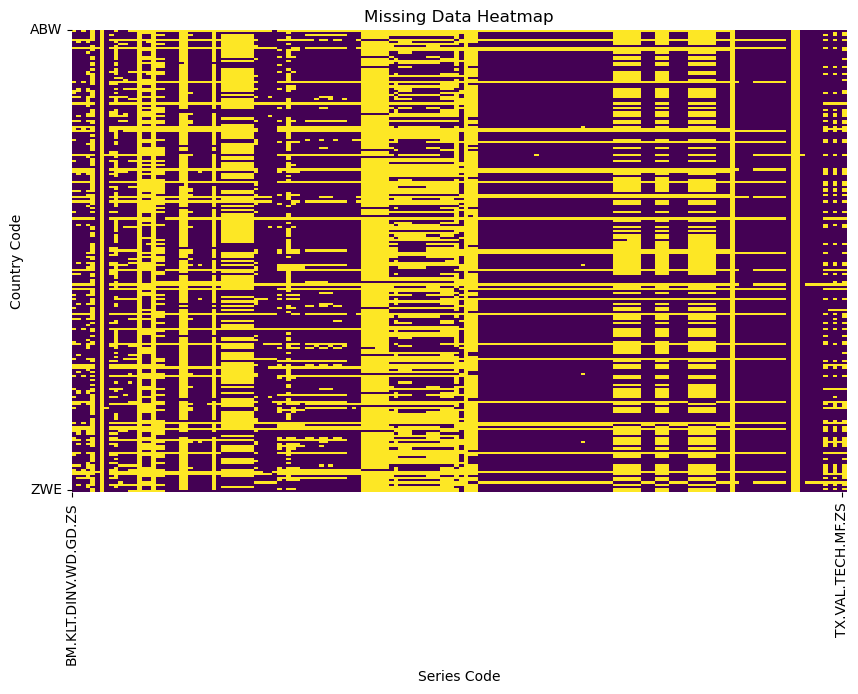

In [9]:
#collecting out the missing datas
missing_data = wide_df.isnull()

#making a heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.xticks([0, len(wide_df.columns) - 1], [wide_df.columns[0], wide_df.columns[-1]])
plt.yticks([0, len(wide_df) - 1], [wide_df.index[0], wide_df.index[-1]])

plt.show()

In [10]:
missing_feature_counts = wide_df.isnull().sum(axis=1) #counting the mises
countries_to_keep = missing_feature_counts[missing_feature_counts < 60].index 
wide_df_filtered = wide_df.loc[countries_to_keep]


In [11]:
wide_df_filtered.head()

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,-0.075895,1.182164e+08,0.480710,2.774835e+08,NaN,84.137138,NaN,53.083405,1.074215,3.051954,...,34656032.0,25985093.0,74.980,8670939.0,25.020,0.262056,185.045514,NaN,434.379370,NaN
ALB,0.059209,1.471281e+08,8.786734,9.960014e+08,NaN,100.000000,NaN,104.967190,33.806812,157.797944,...,2876101.0,1195854.0,41.579,1680247.0,58.421,2.941437,556.660364,11.178982,750.385083,0.647751
ARE,4.400397,NaN,2.516687,NaN,62.018334,100.000000,NaN,110.880526,65.683037,NaN,...,9269612.0,1300990.0,14.035,7968622.0,85.965,5.535168,132.668467,20.228854,533.557945,2.321466
ARG,0.321978,8.235657e+08,0.587564,3.526393e+08,11.462532,100.000000,NaN,16.022067,60.103738,393.196312,...,43847430.0,3671345.0,8.373,40176085.0,91.627,8.478812,124.366098,2.532451,219.174671,8.792815
ARM,0.627752,3.580155e+08,3.206058,6.086609e+08,NaN,100.000000,NaN,102.733263,61.139439,NaN,...,2924816.0,1079784.0,36.918,1845032.0,63.082,4.895353,355.656554,3.821998,609.007478,5.938609


In [12]:
wide_df_filtered = wide_df_filtered.dropna(axis=1) #dropping columns with missing data

In [13]:
wide_df_filtered.head()

Series Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,...,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,0.480710,84.137138,53.083405,62.335417,0.329501,10.595726,2.366712,72.621002,59.122002,61.348999,...,53.598917,880803.0,2.541558,86.570932,2.689163,34656032.0,25985093.0,74.980,8670939.0,25.020
ALB,8.786734,100.000000,104.967190,115.152265,8.496597,66.363445,3.352159,47.271999,35.806000,40.659000,...,69.443689,369116.0,12.833914,44.001540,-0.159880,2876101.0,1195854.0,41.579,1680247.0,58.421
ARE,2.516687,100.000000,110.880526,214.734910,24.659166,90.600007,2.988442,0.013000,0.186000,0.166000,...,85.028100,100499.0,1.084177,17.608178,1.251759,9269612.0,1300990.0,14.035,7968622.0,85.965
ARG,0.587564,100.000000,16.022067,145.330506,22.666391,70.968981,-1.822542,0.172000,0.808000,0.552000,...,63.880519,4849887.0,11.060824,56.542246,0.984742,43847430.0,3671345.0,8.373,40176085.0,91.627
ARM,3.206058,100.000000,102.733263,117.428481,18.176323,64.346030,0.200000,38.342999,30.448999,34.050999,...,69.015521,323610.0,11.064286,44.894943,0.269302,2924816.0,1079784.0,36.918,1845032.0,63.082


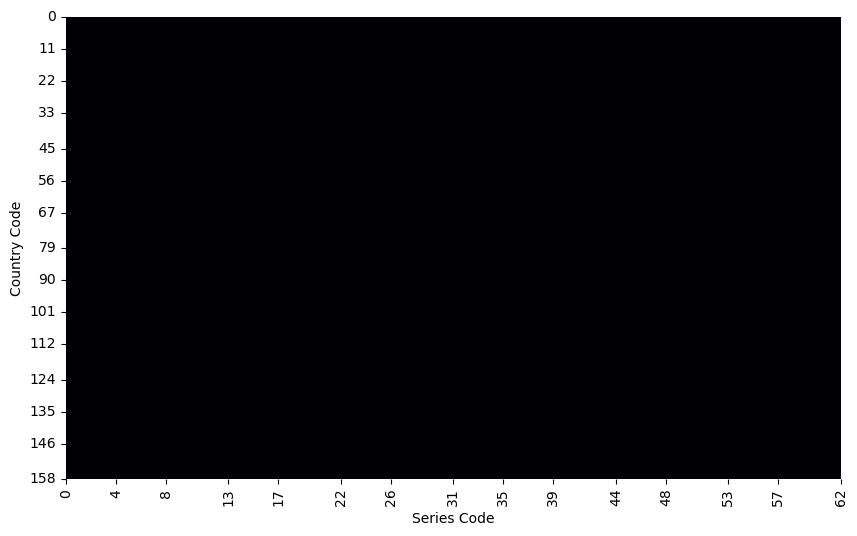

In [14]:
plt.figure(figsize=(10, 6)) # checking if we missed some Nan datas.
sns.heatmap(wide_df_filtered.isnull(), cbar=False, cmap='inferno')
plt.title("Missing Data Heatmap (After Cleaning)")

num_ticks = 15

# Set x-axis ticks
x_ticks = [int(i * wide_df_filtered.shape[1] / (num_ticks - 1)) for i in range(num_ticks)]
x_tick_labels = [int(i) for i in x_ticks]

# Set y-axis ticks
y_ticks = [int(i * wide_df_filtered.shape[0] / (num_ticks - 1)) for i in range(num_ticks)]
y_tick_labels = [int(i) for i in y_ticks]

plt.xticks(x_ticks, labels=x_tick_labels, rotation=90)
plt.yticks(y_ticks, labels=y_tick_labels)

plt.title("")
plt.show()






If we check the maximum values of the ticks in both axis we can see that the number of remaining countries is 158, and the number of remaining featuers is 62

In [15]:
series_code_to_name = dict(zip(df['Series Code'], df['Series Name'])) #we create a map between series code and series name
filtered_series_names = [series_code_to_name[code] for code in wide_df_filtered.columns] #we filtering out the needed series names from the original table

In [16]:
print("Filtered Series Names:")
for idx, series_name in enumerate(filtered_series_names, start=1):
    print(f"{idx}. {series_name}")

Filtered Series Names:
1. Foreign direct investment, net inflows (% of GDP)
2. Access to electricity (% of population)
3. Population density (people per sq. km of land area)
4. Mobile cellular subscriptions (per 100 people)
5. Telephone lines (per 100 people)
6. Individuals using the Internet (% of population)
7. GDP growth (annual %)
8. Employment in agriculture, female (% of female employment) (modeled ILO estimate)
9. Employment in agriculture, male (% of male employment) (modeled ILO estimate)
10. Employment in agriculture (% of total employment) (modeled ILO estimate)
11. Employers, female (% of female employment) (modeled ILO estimate)
12. Employers, male (% of male employment) (modeled ILO estimate)
13. Employers, total (% of total employment) (modeled ILO estimate)
14. Own-account workers, female (% of female employment) (modeled ILO estimate)
15. Own-account workers, male (% of male employment) (modeled ILO estimate)
16. Own-account workers, total (% of male employment) (model

Probably our neghbouring, eastern european countries has similar statistics.

### Task 3

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# according to the presentation the 0th step is the standardization of the data
wide_df_filtered_standardized = (wide_df_filtered - wide_df_filtered.mean())/wide_df_filtered.std()

In [19]:
pca = PCA(3) #now we perform the PCA with 3 principal components
principal_components = pca.fit_transform(wide_df_filtered_standardized)

In [20]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

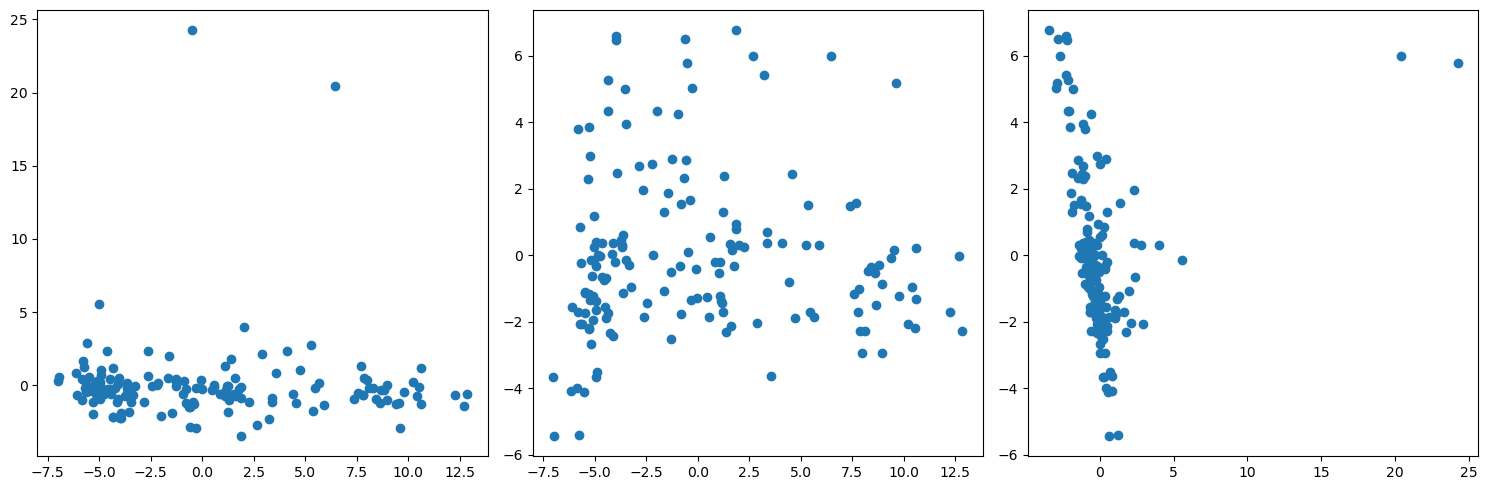

In [21]:

# Create subplots with three separate plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].scatter(principal_df['PC1'],principal_df['PC2'])

axes[1].scatter(principal_df['PC1'],principal_df['PC3'])

axes[2].scatter(principal_df['PC2'],principal_df['PC3'])




plt.tight_layout()
plt.show()


In [22]:
pca.components_[1][abs(pca.components_[1]).argsort()[::-1]]

array([ 0.33763442,  0.3367507 ,  0.33672968,  0.33609285,  0.32863095,
        0.32635215,  0.31778207,  0.31732166, -0.12075835, -0.1207048 ,
       -0.11276764, -0.11217139, -0.10855948, -0.10059145,  0.06996052,
       -0.06874212,  0.06615741,  0.06065932, -0.06045696, -0.05745751,
       -0.05725861,  0.05555325,  0.0543866 ,  0.05010841,  0.04718309,
       -0.04680294,  0.03911873, -0.03877924,  0.03872902, -0.03458033,
       -0.03331259,  0.03147697,  0.02163999, -0.02108435,  0.01959383,
       -0.01818181,  0.01745559,  0.01708852, -0.01667367,  0.01552837,
        0.01491217, -0.01295152,  0.01293582,  0.01282131,  0.01273681,
        0.01225864,  0.01167264, -0.01135923,  0.01135923,  0.01080611,
       -0.01080611,  0.01040203, -0.00990515,  0.00990515,  0.00960637,
       -0.00960637, -0.00571485,  0.0046303 ,  0.00462729,  0.00443809,
       -0.00364537,  0.00173457])

In [23]:
# saved the previous coeffs
top_indices = abs(pca.components_[1]).argsort()[::-1]

# searched their codes
top_series_codes = wide_df_filtered.columns[top_indices]

# then their names 
top_names = [series_code_to_name[code] for code in top_series_codes]


print("Top Features (Series Codes) for PC2:")
for code, name in zip(top_series_codes, top_names):
    print(f"Series Code: {code}, Series Name: {name}")


Top Features (Series Codes) for PC2:
Series Code: SP.POP.1564.TO, Series Name: Population ages 15-64, total
Series Code: SP.POP.TOTL, Series Name: Population, total
Series Code: SL.EMP.TOTL, Series Name: Total employment, total (ages 15+)
Series Code: SL.TLF.TOTL.IN, Series Name: Labor force, total
Series Code: SP.URB.TOTL, Series Name: Urban population
Series Code: SP.POP.65UP.TO, Series Name: Population ages 65 and above, total
Series Code: SP.RUR.TOTL, Series Name: Rural population
Series Code: SP.POP.0014.TO, Series Name: Population ages 0-14, total
Series Code: SL.UEM.TOTL.FE.ZS, Series Name: Unemployment, female (% of female labor force) (modeled ILO estimate)
Series Code: SL.UEM.TOTL.ZS, Series Name: Unemployment, total (% of total labor force) (modeled ILO estimate)
Series Code: SL.UEM.TOTL.MA.ZS, Series Name: Unemployment, male (% of male labor force) (modeled ILO estimate)
Series Code: SL.UEM.1524.FE.ZS, Series Name: Unemployment, youth female (% of female labor force ages 15

### Task 4

In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2,random_state=0)
tsne_fit = tsne.fit_transform(wide_df_filtered_standardized) 
tsne_df = pd.DataFrame(data=tsne_fit, columns=['Component 1', 'Component 2'])

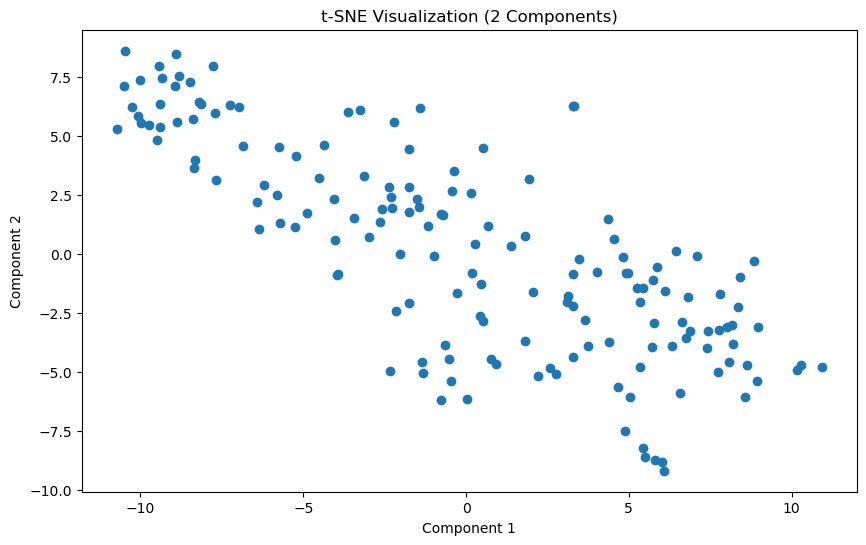

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'])
plt.title("t-SNE Visualization (2 Components)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

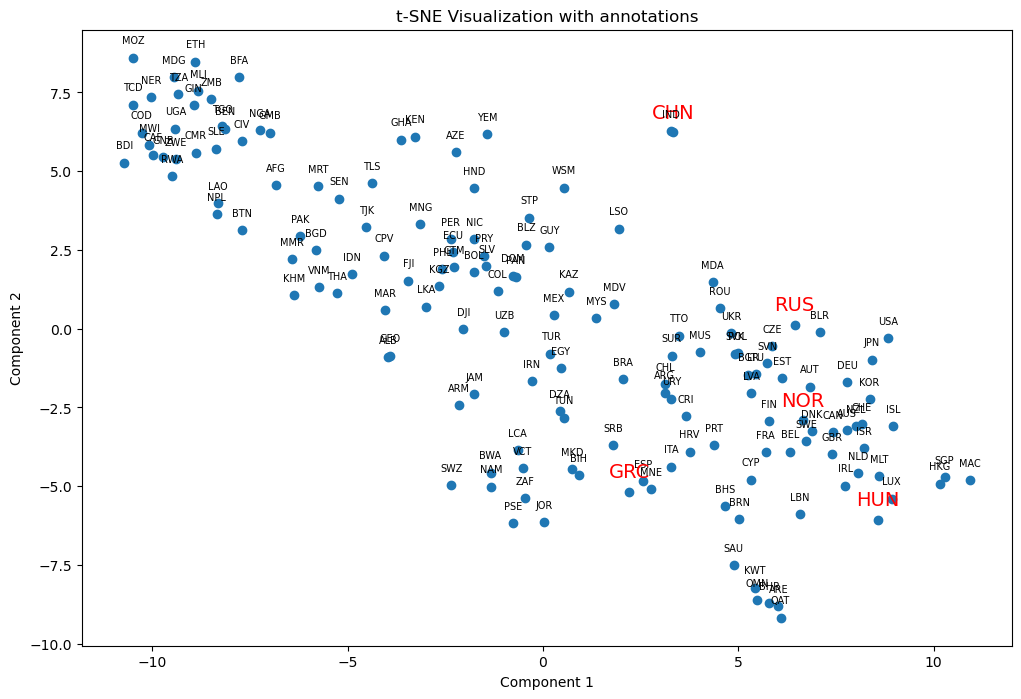

In [27]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'])
highlight_countries = ['HUN', 'GRC', 'NOR', 'CHN', 'RUS']

# Annotate a selection of data points with their labels
for i, label in enumerate(wide_df_filtered.index):
    x = tsne_df.loc[i, 'Component 1'] #we find the location on both axis first
    y = tsne_df.loc[i, 'Component 2']
    fontsize = 7 if label not in highlight_countries else 14  # Adjusted the fontsize for highlighted countries
    color = 'red' if label in highlight_countries else 'black'  # and set a different color for highlighted countries
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = fontsize, color = color) #then we annote the correct label to the correst point

# Set plot title and labels
plt.title("t-SNE Visualization with Annotations (All Points)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
# Set plot title and labels
plt.title("t-SNE Visualization with annotations")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Show the plot
plt.show()


### Task 5

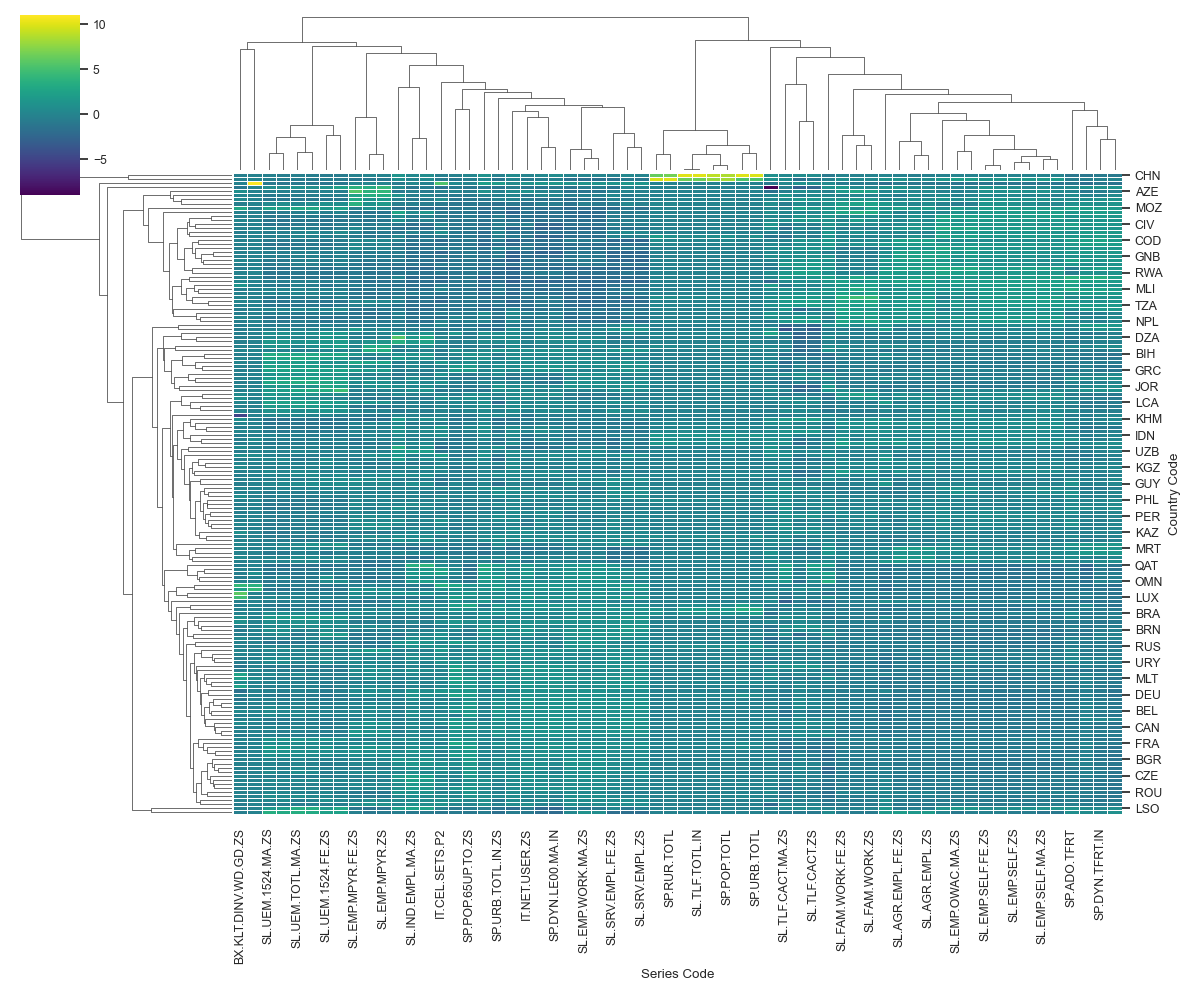

In [28]:
sns.set(font_scale=0.8)  # filtered and scaled
sns.clustermap(wide_df_filtered_standardized, cmap="viridis", linewidths=0.5, figsize=(12, 10))

In [29]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4, random_state=0)
cluster_data = kmeans.fit_transform(wide_df_filtered_standardized)





c:\Users\boton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\boton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


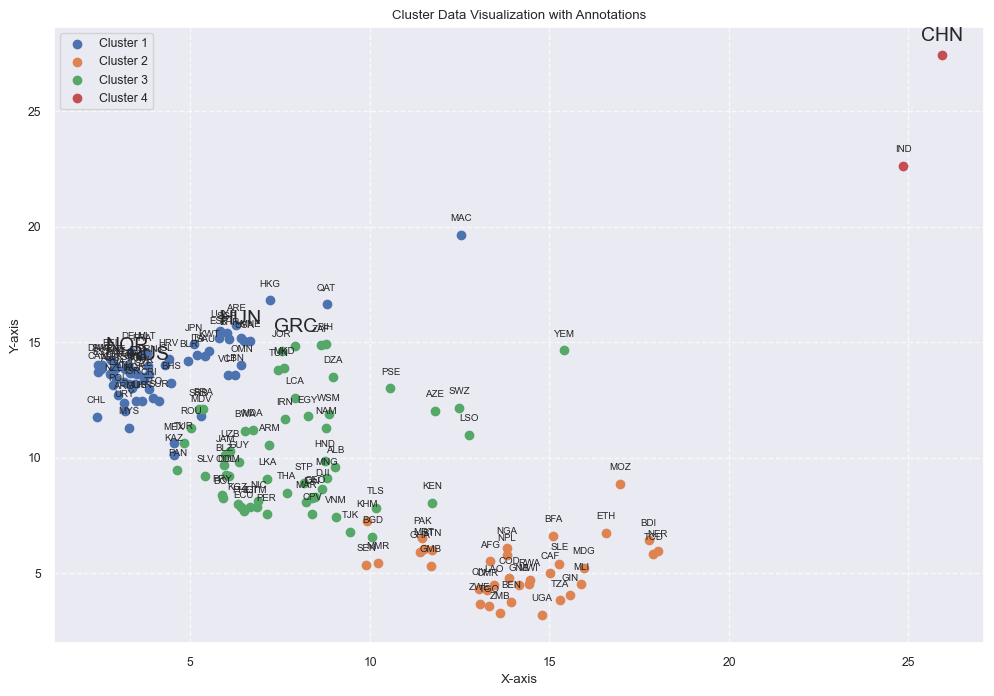

In [30]:
highlight_countries = ['HUN', 'GRC', 'NOR', 'CHN', 'RUS']

# Assuming 'x' and 'y' are the cluster coordinates from the cluster data
x = cluster_data[:, 0]
y = cluster_data[:, 1]

# Extract cluster assignments from the K-Means model
cluster_labels = kmeans.labels_

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(12, 8))
for cluster in range(4):  # Assuming you have 4 clusters
    cluster_mask = cluster_labels == cluster
    cluster_x = x[cluster_mask]
    cluster_y = y[cluster_mask]
    if len(cluster_x) > 0:  # Check if there are data points in the cluster
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {cluster + 1}')

# Annotate data points with their labels
for i, label in enumerate(wide_df_filtered.index):
    fontsize = 7 if label not in highlight_countries else 14 
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=fontsize)

# Set plot title and labels
plt.title("Cluster Data Visualization with Annotations")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
